Linear Regression - MSE: 16.30, MAE: 2.91
Logistic Regression - MSE: 143.68, MAE: 8.90


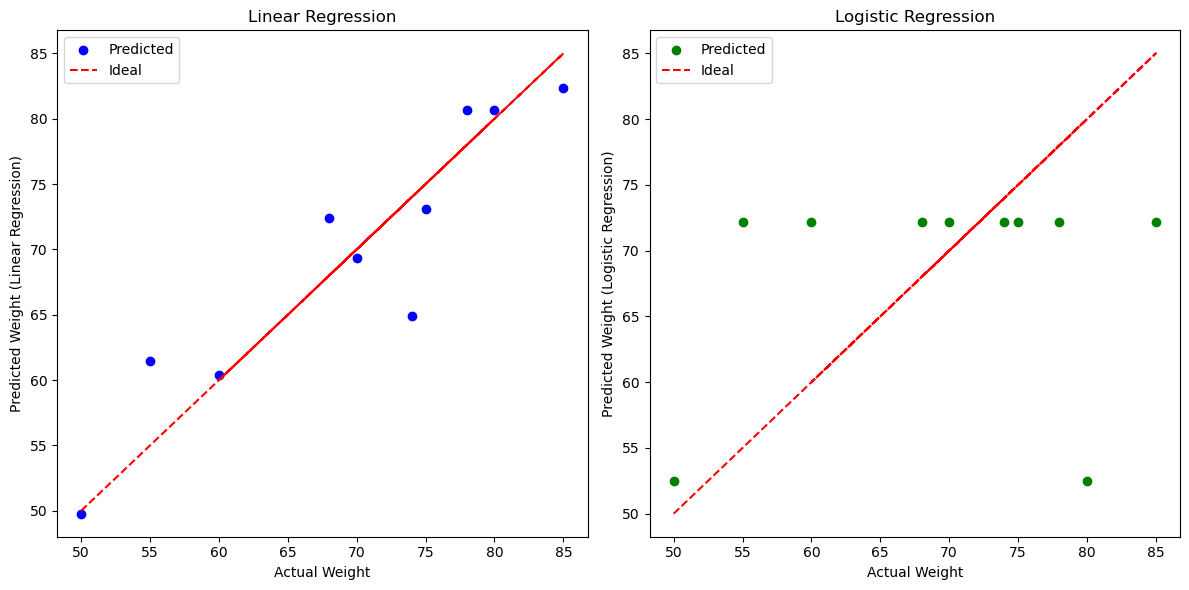

Linear Regression - MSE: 16.30, MAE: 2.91
Logistic Regression - MSE: 143.68, MAE: 8.90


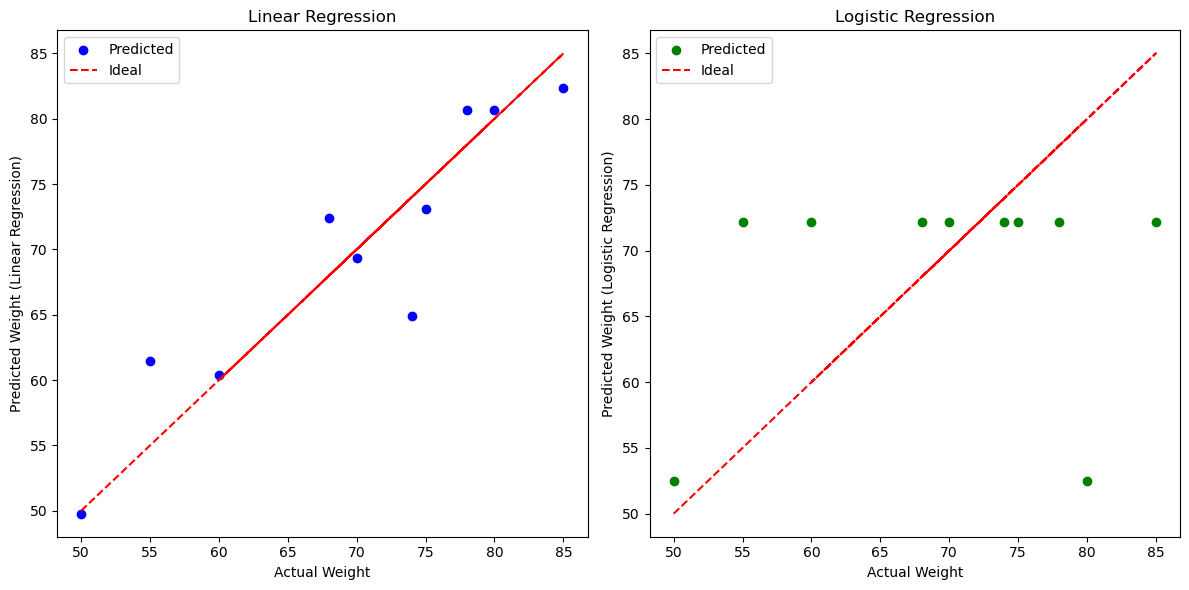

Linear Regression - MSE: 16.30, MAE: 2.91
Logistic Regression - MSE: 143.68, MAE: 8.90


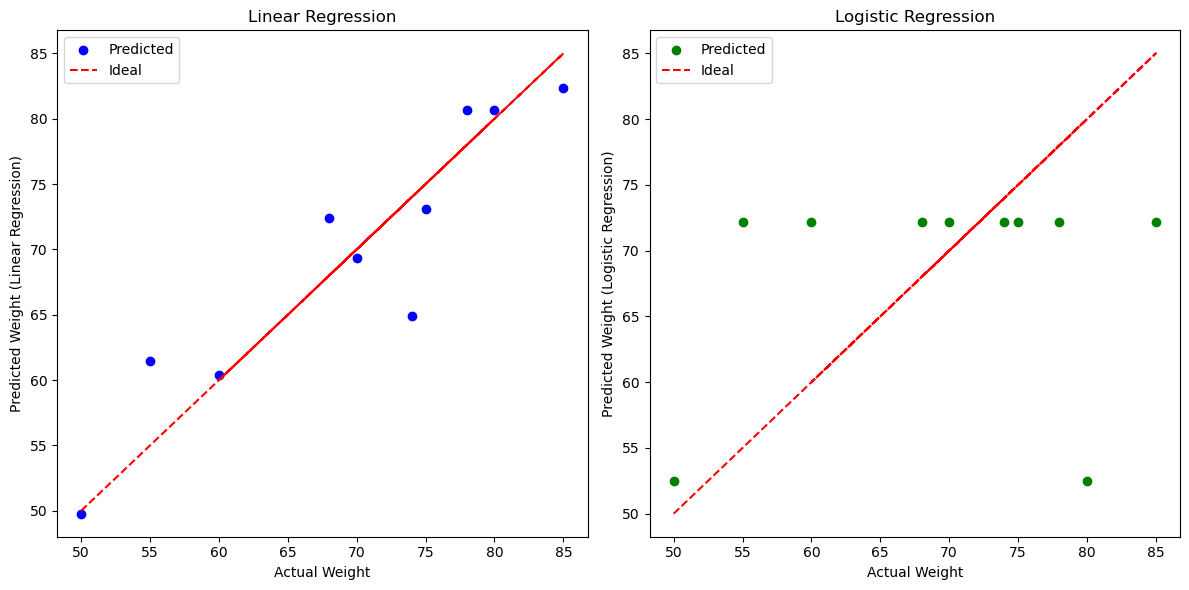

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import messagebox

# Sample data
data = {
    'height': [1.5, 1.6, 1.7, 1.8, 1.65, 1.55, 1.75, 1.72, 1.68, 1.62],
    'occupation': [0, 1, 2, 0, 3, 4, 5, 6, 3, 2],
    'weight': [50, 55, 75, 80, 70, 60, 85, 78, 68, 74]
}

# Convert data to numpy arrays
height = np.array(data['height']).reshape(-1, 1)
occupation = np.array(data['occupation']).reshape(-1, 1)
X = np.hstack([height, occupation])  # Combine height and occupation into feature matrix
y = np.array(data['weight'])  # Weight is the label

# Create and fit the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X, y)

# Create and fit the Logistic Regression model
# For Logistic Regression, we need to classify weights into categories
def weight_to_class(weight):
    if weight < 60:
        return 0  # Underweight
    elif weight > 80:
        return 2  # Overweight
    else:
        return 1  # Normal weight

y_class = np.array([weight_to_class(w) for w in y])

# Check if there are at least two classes in the data
if len(np.unique(y_class)) < 2:
    raise ValueError("The data must contain at least two classes for Logistic Regression.")

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X, y_class)

# Function to calculate BMI and classify weight status
def classify_bmi(height, weight):
    bmi = weight / (height ** 2)
    if bmi < 18.5:
        return bmi, "Underweight"
    elif bmi > 25:
        return bmi, "Overweight"
    else:
        return bmi, "Normal weight"

# Function to predict weight and classify BMI
def predict_weight():
    try:
        # Get values from the interface
        input_height = float(height_entry.get())
        input_occupation = occupation_var.get()
        
        # Encode occupation
        occupation_mapping = {
            "Office Worker": 0, "Factory Worker": 1, "Athlete": 2,
            "Programmer": 3, "Designer": 4, "Doctor": 5, "Teacher": 6,
            "Lawyer": 7, "Scientist": 8, "Engineer": 9, "Chef": 10,
            "Architect": 11, "Pilot": 12, "Artist": 13, "Journalist": 14,
            "Musician": 15, "Police Officer": 16, "Firefighter": 17, 
            "Driver": 18, "Farmer": 19
        }
        input_occupation_encoded = occupation_mapping[input_occupation]
        
        # Prepare input data for prediction
        input_data = np.array([[input_height, input_occupation_encoded]])
        
        # Predict weight using Linear Regression
        predicted_weight_linear = linear_model.predict(input_data)[0]
        
        # Predict class using Logistic Regression
        predicted_class = logistic_model.predict(input_data)[0]
        class_mapping = {0: "Underweight", 1: "Normal weight", 2: "Overweight"}
        predicted_weight_class = class_mapping[predicted_class]
        
        # Classify BMI
        bmi, weight_status = classify_bmi(input_height, predicted_weight_linear)
        
        # Display results
        result_label.config(text=f"Predicted Weight (Linear Regression): {predicted_weight_linear:.2f} kg\nBMI: {bmi:.2f}\nWeight Status: {weight_status}\nWeight Status (Logistic Regression): {predicted_weight_class}")
    except ValueError:
        messagebox.showerror("Error", "Please enter a valid number.")
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {e}")

# Evaluate models using LMSE and MAE
def evaluate_models():
    # Predict using Linear Regression
    y_pred_linear = linear_model.predict(X)
    mse_linear = mean_squared_error(y, y_pred_linear)
    mae_linear = mean_absolute_error(y, y_pred_linear)
    
    # Predict class using Logistic Regression
    y_pred_class = logistic_model.predict(X)
    # Estimate weight from predicted classes
    y_pred_weight = np.array([np.mean([w for w, c in zip(y, y_class) if c == p]) for p in y_pred_class])
    mse_logistic = mean_squared_error(y, y_pred_weight)
    mae_logistic = mean_absolute_error(y, y_pred_weight)
    
    # Print the evaluation metrics
    print(f"Linear Regression - MSE: {mse_linear:.2f}, MAE: {mae_linear:.2f}")
    print(f"Logistic Regression - MSE: {mse_logistic:.2f}, MAE: {mae_logistic:.2f}")
    
    # Plot the results
    plt.figure(figsize=(12, 6))
    
    # Linear Regression
    plt.subplot(1, 2, 1)
    plt.scatter(y, y_pred_linear, color='blue', label='Predicted')
    plt.plot(y, y, color='red', linestyle='--', label='Ideal')
    plt.xlabel('Actual Weight')
    plt.ylabel('Predicted Weight (Linear Regression)')
    plt.title('Linear Regression')
    plt.legend()
    
    # Logistic Regression
    plt.subplot(1, 2, 2)
    plt.scatter(y, y_pred_weight, color='green', label='Predicted')
    plt.plot(y, y, color='red', linestyle='--', label='Ideal')
    plt.xlabel('Actual Weight')
    plt.ylabel('Predicted Weight (Logistic Regression)')
    plt.title('Logistic Regression')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Create the Tkinter interface
root = tk.Tk()
root.title("Weight Prediction and BMI Classification")

# Height input
tk.Label(root, text="Enter height (m):").grid(row=0, column=0)
height_entry = tk.Entry(root)
height_entry.grid(row=0, column=1)

# Occupation selection
tk.Label(root, text="Select occupation:").grid(row=1, column=0)
occupation_var = tk.StringVar(root)
occupation_var.set("Office Worker")  # Default occupation
occupation_menu = tk.OptionMenu(
    root, occupation_var, 
    "Office Worker", "Factory Worker", "Athlete", 
    "Programmer", "Designer", "Doctor", "Teacher",
    "Lawyer", "Scientist", "Engineer", "Chef",
    "Architect", "Pilot", "Artist", "Journalist",
    "Musician", "Police Officer", "Firefighter",
    "Driver", "Farmer"
)
occupation_menu.grid(row=1, column=1)

# Predict button
predict_button = tk.Button(root, text="Predict", command=predict_weight)
predict_button.grid(row=2, column=0, columnspan=2)

# Result label
result_label = tk.Label(root, text="Predicted weight: ")
result_label.grid(row=3, column=0, columnspan=2)

# Evaluate button
evaluate_button = tk.Button(root, text="Evaluate Models", command=evaluate_models)
evaluate_button.grid(row=4, column=0, columnspan=2)

# Run the interface
root.mainloop()


In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
import tkinter as tk
from tkinter import scrolledtext, messagebox

# Sample data
data = {
    'height': [1.5, 1.6, 1.7, 1.8, 1.65, 1.55, 1.75, 1.72, 1.68, 1.62],
    'occupation': [0, 1, 2, 0, 3, 4, 5, 6, 3, 2],
    'weight': [50, 55, 75, 80, 70, 60, 85, 78, 68, 74]
}

# Convert data to numpy arrays
height = np.array(data['height']).reshape(-1, 1)
occupation = np.array(data['occupation']).reshape(-1, 1)
X = np.hstack([height, occupation])  # Combine height and occupation into feature matrix
y = np.array(data['weight'])  # Weight is the label

# Create and fit the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X, y)

# Logistic Regression model for classification
def weight_to_class(weight):
    if weight < 60:
        return 0  # Underweight
    elif weight > 80:
        return 2  # Overweight
    else:
        return 1  # Normal weight

y_class = np.array([weight_to_class(w) for w in y])

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X, y_class)

# Function to calculate BMI and classify weight status
def classify_bmi(height, weight):
    bmi = weight / (height ** 2)
    if bmi < 18.5:
        return bmi, "Underweight"
    elif bmi > 25:
        return bmi, "Overweight"
    else:
        return bmi, "Normal weight"

# Detailed health advice based on BMI classification
def get_health_advice(weight_status):
    if weight_status == "Underweight":
        advice = (
            "Bạn cần tăng cường calo từ các thực phẩm giàu protein và dinh dưỡng.\n\n"
            "Bữa sáng: Trứng ốp la với 2 lát bánh mì (300 calo)\n"
            "Bữa trưa: Cơm, gà nướng và rau xanh (600 calo)\n"
            "Bữa tối: Cá hồi với khoai tây nướng (500 calo)\n"
            "Snack: Hạt điều và sữa chua (200 calo)"
        )
    elif weight_status == "Normal weight":
        advice = (
            "Bạn đang duy trì cân nặng tốt. Tiếp tục ăn uống cân bằng và lành mạnh.\n\n"
            "Bữa sáng: Bột yến mạch với trái cây (250 calo)\n"
            "Bữa trưa: Cơm, cá hấp và rau củ (450 calo)\n"
            "Bữa tối: Gà luộc với súp lơ xanh (400 calo)\n"
            "Snack: Hạt hạnh nhân và táo (150 calo)"
        )
    else:  # Overweight
        advice = (
            "Bạn nên giảm calo và tăng cường các thực phẩm ít chất béo.\n\n"
            "Bữa sáng: Trứng luộc và trái cây (200 calo)\n"
            "Bữa trưa: Salad rau củ với thịt gà (300 calo)\n"
            "Bữa tối: Súp rau củ và cá (350 calo)\n"
            "Snack: Cà rốt và cần tây với hummus (100 calo)"
        )
    return advice

# Function to predict weight and provide detailed advice
def predict_weight():
    try:
        # Get values from the interface
        input_height = float(height_entry.get())
        input_occupation = occupation_var.get()
        
        # Encode occupation
        occupation_mapping = {
            "Office Worker": 0, "Factory Worker": 1, "Athlete": 2,
            "Programmer": 3, "Designer": 4, "Doctor": 5, "Teacher": 6,
            "Lawyer": 7, "Scientist": 8, "Engineer": 9, "Chef": 10,
            "Architect": 11, "Pilot": 12, "Artist": 13, "Journalist": 14,
            "Musician": 15, "Police Officer": 16, "Firefighter": 17, 
            "Driver": 18, "Farmer": 19
        }
        input_occupation_encoded = occupation_mapping[input_occupation]
        
        # Prepare input data for prediction
        input_data = np.array([[input_height, input_occupation_encoded]])
        
        # Predict weight using Linear Regression
        predicted_weight_linear = linear_model.predict(input_data)[0]
        
        # Predict class using Logistic Regression
        predicted_class = logistic_model.predict(input_data)[0]
        class_mapping = {0: "Underweight", 1: "Normal weight", 2: "Overweight"}
        predicted_weight_class = class_mapping[predicted_class]
        
        # Classify BMI
        bmi, weight_status = classify_bmi(input_height, predicted_weight_linear)
        
        # Get detailed health advice
        advice = get_health_advice(weight_status)
        
        # Display results
        chat_text.config(state=tk.NORMAL)
        chat_text.insert(tk.END, f"Nhận dự đoán và lời khuyên sức khỏe:\n"
                                 f"Predicted Weight (Linear Regression): {predicted_weight_linear:.2f} kg\n"
                                 f"BMI: {bmi:.2f}\nWeight Status: {weight_status}\n"
                                 f"Weight Status (Logistic Regression): {predicted_weight_class}\n\n"
                                 f"{advice}\n\n")
        chat_text.config(state=tk.DISABLED)
        chat_text.yview(tk.END)
    except ValueError:
        messagebox.showerror("Error", "Please enter a valid number.")
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {e}")

# Create the Tkinter interface
root = tk.Tk()
root.title("Health Chatbot")

# Create and configure the chat text area
chat_text = scrolledtext.ScrolledText(root, wrap=tk.WORD, state=tk.DISABLED, height=20, width=60)
chat_text.grid(row=0, column=0, columnspan=2)

# Height input
tk.Label(root, text="Enter height (m):").grid(row=1, column=0, padx=10, pady=10)
height_entry = tk.Entry(root)
height_entry.grid(row=1, column=1, padx=10, pady=10)

# Occupation selection
tk.Label(root, text="Select occupation:").grid(row=2, column=0, padx=10, pady=10)
occupation_var = tk.StringVar(root)
occupation_var.set("Office Worker")  # Default occupation
occupation_menu = tk.OptionMenu(
    root, occupation_var, 
    "Office Worker", "Factory Worker", "Athlete", 
    "Programmer", "Designer", "Doctor", "Teacher",
    "Lawyer", "Scientist", "Engineer", "Chef",
    "Architect", "Pilot", "Artist", "Journalist",
    "Musician", "Police Officer", "Firefighter",
    "Driver", "Farmer"
)
occupation_menu.grid(row=2, column=1, padx=10, pady=10)

# Predict button
predict_button = tk.Button(root, text="Predict", command=predict_weight)
predict_button.grid(row=3, column=0, columnspan=2, pady=10)

# Run the interface
root.mainloop()
